# Analyzing NASA Planetary Exploration Budgets in SQL


For much of the last 60 years, NASA has been at the forefront of exploring our solar system. In this live training, we'll see how much money they spent to do this.

For expensive science projects, not least those funded with public money, the price of conducting research is a huge consideration, so budgeting is important.

Here, we'll use a cleaned up version of the [public dataset](https://www.planetary.org/space-policy/planetary-exploration-budget-dataset) provided by the The Planetary Society.

## Task 1: What is the total cost of all planetary missions over all time?

A good first step in any budgetary analysis is to determine how much money has been spent in total.

For this, we need the `mission_budgets` table. Each row represents the cost in a fiscal year, of one aspect of a project for one mission. There are 5 columns:

- `mission`: The name of the mission.
- `fiscal_year`: The year, for accounting purposes.
- `cost_type`: Fine-grained aspect of the project, e.g., "Spacecraft".
- `cost_group`: Broader aspect of the project, e.g., "Development/Implementation".
- `cost_MUSD`: Cost in million US dollars.


### Instructions

- Calculate the total cost of all missions over all time as `total_cost_MUSD`.

In [58]:
-- Calculate the total cost of all missions over all time
SELECT SUM("cost_MUSD") as total_cost_MUSD
FROM mission_budgets;

,total_cost_musd
0,41406.554506


## Task 2: What happens when you adjust for inflation?

Due to inflation, costs in the 1960s are not directly equivalent to those in the 2020s. We need to adjust for inflation in order to get a cost in current currency.

Correction factors are available in the `inflation` table. Each row represents an inflation adjustment for a time period relative to today. ther are two columns.

- `fiscal_year`: The year, for accounting purposes. Note that in 1976, inflation was especially high, so two values are provided. "1976" represents the start of the year, and "1976TQ" represents the third quarter onwards.
- `inflation_adjustment`: Multiply currency values from the past time by this number to get current currency values.

### Instructions

- Join the `mission_budgets` table to the `inflation` table on the fiscal year.
- Calculate the total cost of all missions over all time, adjusted for inflation as `adjusted_total_cost_MUSD`.

In [59]:
-- Calculate the total cost of all missions over all time, adjusted for inflation
SELECT SUM("cost_MUSD"*inflation_adjustment) as adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
USING(fiscal_year);

,adjusted_total_cost_musd
0,80992.593983


## Task 3: Which was the most expensive mission?

The biggest, grandest missions make headlines, but at some point, someone always asks questions about how much things cost, and the biggest budgets are the first place people look for cost savings. Knowing which is the most expensive project is an essential task for anyone responsible for a budget.

### Instructions

- Group the budgets by mission, and calculate the total cost for each mission.
- Get the mission with the highest total cost.

In [60]:
-- Get the mission with the highest total cost
SELECT mission, SUM("cost_MUSD"*inflation_adjustment) as adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
USING(fiscal_year)
GROUP BY mission
ORDER BY adjusted_total_cost_MUSD DESC
LIMIT 1;

,mission,adjusted_total_cost_musd
0,Viking,7208.541041


## Task 4: How much was spent each year?

Understanding how budgets change over time is also important. NASA has not been immune to the wax and wane of the US economy over the decades, nor the change in political enthusiasm for planetary exploration. More generally, to understand your current budget, it's usually helpful to know the context of how much budget you or your predecessors had in previous years.

### Instructions

- Group the budgets by mission, and calculate the inflation adjusted total cost for each mission.
- Save the results as the data frame `total_cost_by_year`.

In [61]:
-- Calculate the inflation adjusted total cost per year
SELECT fiscal_year, SUM("cost_MUSD"*inflation_adjustment) as adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
USING(fiscal_year)
GROUP BY fiscal_year
ORDER BY fiscal_year;

,fiscal_year,adjusted_total_cost_musd
0,1960,261.139746
1,1961,674.849760
2,1962,1624.488450
3,1963,2268.368675
4,1964,2412.935820
...,...,...
72,2031,149.605633
73,2032,149.590728
74,2033,149.593212
75,2034,128.050000


### Instructions

- Draw a bar plot of total cost vs. year.
- Write down your interpretation of the plot.

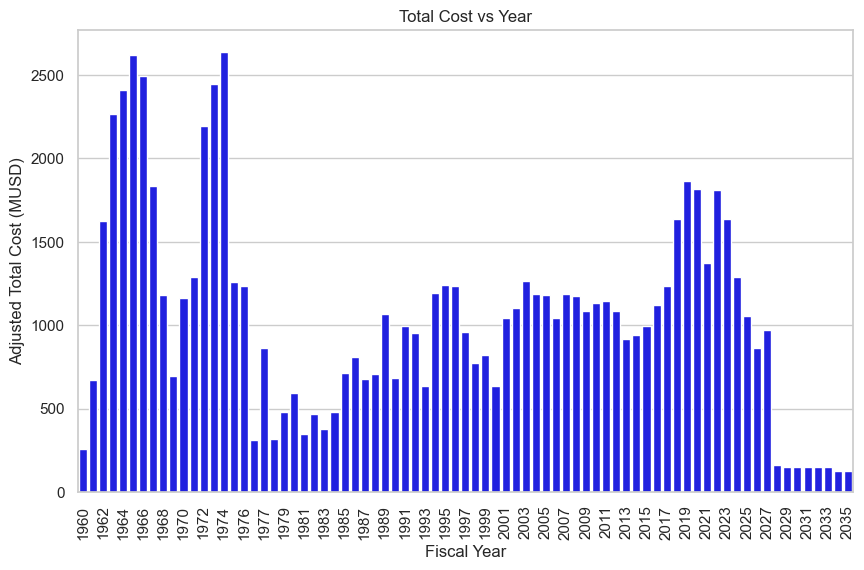

In [62]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot of total cost vs. year
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(data=total_cost_by_year, x="fiscal_year", y="adjusted_total_cost_musd", color="blue")

# Set the x-axis labels to display every 2 years
label_interval = 2
plt.xticks(range(0, len(total_cost_by_year), label_interval), total_cost_by_year["fiscal_year"][::label_interval])

plt.title("Total Cost vs Year")
plt.xlabel("Fiscal Year")
plt.ylabel("Adjusted Total Cost (MUSD)")
plt.xticks(rotation=90)

plt.show()

Notably, there are distinct peaks in expenses during significant periods. 
1. The first peak is observed during the space race in the 1960s, reflecting the high investments made during this era of intense competition.
2. Another prominent peak occurs in the 1970s, coinciding with the Viking mission, demonstrating a significant allocation of resources for that particular endeavor.
3. Additionally, a noticeable reduction in expenses is observed during the 2021 COVID-19 pandemic, which likely impacted space exploration budgets. These patterns highlight key historical milestones and external factors that have influenced expenditure trends in space missions over time.


## Task 5: How much was spent on each destination?

The 1960s was famous for the "Space Race" between the United States and Russia to be the first to get a man on the moon. In the time since then, attention has also been turned to the other planets in the solar system and to small bodies like asteroids and comets.

To analyze spending by destination, we'll need to look at the `mission_details` table. Each row represenats one mission. There are 4 columns:

- `mission`: The name of the mission.
- `mission_full_name`: The formal name of the mission.
- `destination`: The place in the solar system that the mission is exploring.
- `program`: The name of the NASA program that the mission is part of.

### Instructions

- Join the budgets to the mission details on the `mission` column.
- Calculate the total cost by destination.

In [63]:
-- Calculate the inflation adjusted total cost per destination
SELECT destination, SUM("cost_MUSD"*inflation_adjustment) as adjusted_total_cost_MUSD
	FROM mission_budgets
	LEFT JOIN inflation
		USING(fiscal_year)
	LEFT JOIN mission_details
    	USING(mission)
	GROUP BY destination
    ORDER BY adjusted_total_cost_MUSD DESC;

,destination,adjusted_total_cost_musd
0,Mars,31725.348594
1,Outer Planets,21827.564786
2,The Moon,12982.887263
3,Small Bodies,7365.860162
4,Venus,4796.703011
5,Mercury,1519.605957
6,Earth-Sun L1,427.220100
7,The Sun,347.404110


## Task 6: How did spending by destination change over time?

You've already looked at spending by year and spending by destination individually. You can get more insight by looking at both of these things together.

### Instructions

- Join the budgets, inflation adjustment and details tables as before.
- Group the budgets by fiscal year and destination.
- Calculate the total adjusted cost for each group.
- Store the data frame as `total_cost_by_year_and_destination`.

In [64]:
-- Calculate the inflation adjusted total cost per year per destination
SELECT fiscal_year, destination, SUM("cost_MUSD"*inflation_adjustment) as adjusted_total_cost_MUSD
	FROM mission_budgets
	LEFT JOIN inflation
		USING(fiscal_year)
	LEFT JOIN mission_details
    	USING(mission)
	GROUP BY fiscal_year, destination
    ORDER BY fiscal_year, destination;

,fiscal_year,destination,adjusted_total_cost_musd
0,1960,The Moon,261.139746
1,1961,The Moon,674.849760
2,1962,The Moon,1248.174750
3,1962,Venus,376.313700
4,1963,Mars,382.522200
...,...,...,...
277,2032,Small Bodies,21.540728
278,2033,Outer Planets,128.050000
279,2033,Small Bodies,21.543212
280,2034,Outer Planets,128.050000


### Instructions


- Draw a bar plot of total cost vs. year, colored by destination.
- Write down your interpretation of the plot.

In [65]:
# Draw a bar plot of total cost vs. year, colored by destination
fig = px.bar(total_cost_by_date_and_destination, x="fiscal_year", y="adjusted_total_cost_musd", color="destination")
fig.update_layout(xaxis={"categoryorder": "category ascending"})
fig.update_layout(title="Total Cost vs Year, by destination", title_x = 0.5)
fig.show()

During the early years of space exploration, the primary celestial body of interest was the Moon, as evidenced by the highest exploration expenditure. However, once the space race ended in the late 1960s, attention shifted towards Mars, marking a significant transition.

Following 1975, there was a period of mixed interest in the Outer Planets and Venus, with subsequent shifts towards a combination of Outer Planets and Mars starting in the early 90s. . This period reflected a diverse range of exploratory efforts, indicating a continued fascination with both the outer regions of our solar system and the neighboring planets Venus and Mars.

Interestingly, at the dawn of the 2000s, there was a resurgence in interest for Mars, accompanied by notable expenditures. Concurrently, exploration efforts targeting Small Bodies and Outer Planets gained momentum but remained relatively secondary to the Mars missions.

Overall, the plot illustrates the dynamic nature of space exploration, highlighting the changing priorities and shifts in investment across different celestial bodies throughout history.

## Keep going!

If you want to continue analyzing the data, here are some questions you can answer. Add you analysis below, then publish this workspace to your profile.

- Which part of the mission is most expensive, on average? (Does it make a difference if you look at `cost_type` or `cost_group`?)

In [66]:
SELECT cost_type, cost_group, SUM("cost_MUSD"*inflation_adjustment) as adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
USING(fiscal_year)
GROUP BY cost_type, cost_group
ORDER BY adjusted_total_cost_musd DESC;

,cost_type,cost_group,adjusted_total_cost_musd
0,Spacecraft,Development/Implementation,25471.065252
1,Implementation (incl LV),Development/Implementation (incl LV),13047.202700
2,Operations,Operations & Data Analysis,12499.019887
3,Formulation,Formulation,8770.964100
4,Launch Vehicle(s),Launch Vehicle(s) & Support,6113.253462
5,Development (incl LV),Development/Implementation (incl LV),3551.962900
6,Development,Development/Implementation,2975.167700
7,Experiments,Science & Experiments,2232.492429
8,Science,Science & Experiments,1544.758545
9,Launch Support,Launch Vehicle(s) & Support,1476.729500


In [67]:
SELECT cost_group, SUM("cost_MUSD"*inflation_adjustment) as adjusted_total_cost_MUSD
FROM mission_budgets
LEFT JOIN inflation
USING(fiscal_year)
GROUP BY cost_group
ORDER BY adjusted_total_cost_musd DESC;

,cost_group,adjusted_total_cost_musd
0,Development/Implementation,28829.239652
1,Development/Implementation (incl LV),16599.165600
2,Operations & Data Analysis,13421.083087
3,Formulation,8770.964100
4,Launch Vehicle(s) & Support,7930.072962
5,Science & Experiments,3777.250974
6,Project Management/Ground Operations,1664.817608


The analysis reveals that when considering the cost aspect of missions, it is crucial to examine both the cost_type and cost_group variables. It is noteworthy that certain cost types, such as Microrover and Data Analysis, are observed to be the least expensive among the missions.

However, it becomes apparent that the cost groups to which these types belong play a significant role. Development/Implementation and Operations & Data Analysis, are ranked at the top, occupying the first and third positions in the ranking of the most expensive categories.

- For most programs, all the mission have the same destination, but that isn't always true. Which programs have more than one destination for their missions?

In [68]:
-- Checking the total number of programs
SELECT COUNT(DISTINCT program) as unique_program
FROM mission_details;

,unique_program
0,15


In [69]:
-- Checking how many programs have more than one destination
SELECT COALESCE(NULLIF(program, ''), 'No Program') AS program, COUNT(destination) AS destination_count
FROM mission_details
GROUP BY program
HAVING COUNT(destination) > 1
ORDER BY destination_count DESC;

,program,destination_count
0,Discovery,14
1,Mars Exploration,9
2,Mariner,6
3,No Program,5
4,Pioneer,4
5,New Frontiers,3
6,SIMPLEx,3
7,Lunar Discovery and Exploration,2
8,Solar System Exploration,2


Out of the 15 programs recorded in the mission details dataset, excluding missions with no assigned programs, there are 8 programs that have missions with multiple destinations. 